In [91]:
import pandas as pd


In [92]:
from sklearn.model_selection import train_test_split


In [93]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [94]:
from sklearn.compose import ColumnTransformer

In [95]:
from sklearn.pipeline import Pipeline


In [96]:
from sklearn.ensemble import RandomForestClassifier


In [97]:
prior_auth = pd.read_csv('Prior_Auth.csv')

In [98]:
prior_auth

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,pet_id
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953
1,003031d6-cf95-4c0c-b0f2-06c89dff726f,Harper,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,NaN,PET-8260
2,003fae46-1e76-4aba-8670-95d9dabf1848,Gunther,Vaccination,2024-07-17 14:26:19,1002,4,Approved,False,NaN,PET-1854
3,004389e2-75b9-484d-ab9b-cd9b00e8af4f,Buddy,X-ray,2024-04-25 14:26:19,1003,3,Denied,False,NaN,PET-7814
4,004e13f1-d8ed-4e32-8d3d-886764f7835b,Roxy,Dental Cleaning,2023-09-25 14:26:19,1019,1,Denied,False,NaN,PET-4027
...,...,...,...,...,...,...,...,...,...,...
1995,a8f19c71-e8df-4500-8746-7fd8f0e38f1d,Hudson,Lab Test,2024-01-16 14:26:19,1020,3,Approved,True,NaN,PET-1277
1996,a9023a23-4480-45ed-9ae2-a2304dbeb04d,Molly,Vaccination,2024-06-24 14:26:19,1019,2,Approved,False,NaN,PET-7239
1997,a92a1bb7-79d4-48e8-89cd-c4f81bb1404d,Bentley,Dental Cleaning,2023-12-10 14:26:19,1005,1,Approved,False,NaN,PET-3199
1998,a94074bb-8860-45b2-95db-e8ddccdb259f,Sissy,Lab Test,2024-03-24 14:26:19,1016,1,Approved,False,NaN,PET-2273


In [99]:
Claims = pd.read_csv('Claims.csv')

In [100]:
Claims

,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Pet Id,Claim Date
0,Sophie,1008,1551DB6D,Check-up,74.64,PET-1953,3/9/2023 14:26
1,Sophie,1008,836C194D,Dental Cleaning,157.98,PET-1953,3/27/2023 14:26
2,Sophie,1008,4E38C924,X-ray,354.67,PET-1953,12/23/2022 14:26
3,Harper,1006,A4B45594,Check-up,117.51,PET-8260,7/26/2023 14:26
4,Harper,1006,16599925,Check-up,50.53,PET-8260,10/1/2022 14:26
...,...,...,...,...,...,...,...
783,Misty,1014,604E1E4F,Dental Cleaning,179.73,PET-1154,4/7/2022 14:26
784,Misty,1014,63837015,Lab Test,495.42,PET-1154,9/19/2022 14:26
785,Misty,1014,B22DB52B,X-ray,942.73,PET-1154,8/16/2023 14:26
786,Misty,1014,F416B4BC,Check-up,52.39,PET-1154,7/16/2023 14:26


In [101]:
print(prior_auth.columns)

Index(['id', 'pet_name', 'service', 'submission_date', 'provider_id', 'unit',
       'authstatus', 'auto_approved', 'clinical_reviewer', 'pet_id'],
      dtype='object')


In [102]:
print(Claims.columns)

Index(['Pet_Name', 'Provider NPI', 'Claim ID', 'Claim Type', 'Amount Paid',
       'Pet Id', 'Claim Date'],
      dtype='object')


In [ ]:
import pandas as pd


prior_auth = prior_auth.rename(columns={'pet_id': 'Pet_id'})
Claims = Claims.rename(columns={'Pet Id': 'Pet_id'})

merged_data = pd.merge(prior_auth, Claims,on='Pet_id',how='inner')

merged_data = merged_data.dropna(subset=['Pet_id'])

print(merged_data.head())

print(merged_data.info())

                                     id pet_name      service  \
0  001d0f43-33a2-4add-b8a8-2b32b73ef318   Sophie  Vaccination   
1  001d0f43-33a2-4add-b8a8-2b32b73ef318   Sophie  Vaccination   
2  001d0f43-33a2-4add-b8a8-2b32b73ef318   Sophie  Vaccination   
3  1585e7f9-4b87-4b37-9817-91917c10fd99   Sophie     Check-up   
4  1585e7f9-4b87-4b37-9817-91917c10fd99   Sophie     Check-up   

       submission_date  provider_id  unit authstatus  auto_approved  \
0  2024-02-24 14:26:19         1008     1   Approved          False   
1  2024-02-24 14:26:19         1008     1   Approved          False   
2  2024-02-24 14:26:19         1008     1   Approved          False   
3  2023-08-23 14:26:19         1000     1   Approved          False   
4  2023-08-23 14:26:19         1000     1   Approved          False   

  clinical_reviewer    Pet_id Pet_Name  Provider NPI  Claim ID  \
0               NaN  PET-1953   Sophie          1008  1551DB6D   
1               NaN  PET-1953   Sophie          10

In [151]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,4E38C924,X-ray,354.67,12/23/2022 14:26
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,Dental Cleaning,179.73,4/7/2022 14:26
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,Lab Test,495.42,9/19/2022 14:26
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,X-ray,942.73,8/16/2023 14:26
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,Check-up,52.39,7/16/2023 14:26


In [152]:
merged_data.drop_duplicates(inplace=True)

In [153]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,4E38C924,X-ray,354.67,12/23/2022 14:26
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,Dental Cleaning,179.73,4/7/2022 14:26
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,Lab Test,495.42,9/19/2022 14:26
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,X-ray,942.73,8/16/2023 14:26
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,Check-up,52.39,7/16/2023 14:26


In [154]:
print(merged_data.isnull().sum())

id                      0
pet_name                0
service                 0
submission_date         0
provider_id             0
unit                    0
authstatus              0
auto_approved           0
clinical_reviewer    6929
Pet_id                  0
Pet_Name                0
Provider NPI            0
Claim ID                0
Claim Type              0
Amount Paid             0
Claim Date              0
dtype: int64


In [155]:
merged_data['clinical_reviewer'] = merged_data['clinical_reviewer'].fillna('Not Assigned')


In [156]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,4E38C924,X-ray,354.67,12/23/2022 14:26
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,Dental Cleaning,179.73,4/7/2022 14:26
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,Lab Test,495.42,9/19/2022 14:26
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,X-ray,942.73,8/16/2023 14:26
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,Check-up,52.39,7/16/2023 14:26


In [157]:
merged_data['Amount Paid'] = merged_data['Amount Paid'].fillna(merged_data['Amount Paid'].mean())

In [158]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,4E38C924,X-ray,354.67,12/23/2022 14:26
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,Dental Cleaning,179.73,4/7/2022 14:26
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,Lab Test,495.42,9/19/2022 14:26
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,X-ray,942.73,8/16/2023 14:26
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,Check-up,52.39,7/16/2023 14:26


In [ ]:
merged_data['service'] = merged_data['service'].str.lower()
merged_data['Claim Type'] = merged_data['Claim Type'].str.lower()

In [160]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,1551DB6D,check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,836C194D,dental cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,4E38C924,x-ray,354.67,12/23/2022 14:26
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,check-up,74.64,3/9/2023 14:26
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,dental cleaning,157.98,3/27/2023 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,dental cleaning,179.73,4/7/2022 14:26
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,lab test,495.42,9/19/2022 14:26
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,x-ray,942.73,8/16/2023 14:26
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,check-up,52.39,7/16/2023 14:26


In [ ]:

import pandas as pd

merged_data['Claim Date'] = pd.to_datetime(merged_data['Claim Date'])
merged_data['submission_date'] = pd.to_datetime(merged_data['submission_date'])

merged_data['days_to_claim'] = (merged_data['submission_date'] - merged_data['Claim Date']).dt.days

In [162]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date,days_to_claim
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,1551DB6D,check-up,74.64,2023-03-09 14:26:00,352
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,836C194D,dental cleaning,157.98,2023-03-27 14:26:00,334
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned,PET-1953,Sophie,1008,4E38C924,x-ray,354.67,2022-12-23 14:26:00,428
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,check-up,74.64,2023-03-09 14:26:00,167
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,dental cleaning,157.98,2023-03-27 14:26:00,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,dental cleaning,179.73,2022-04-07 14:26:00,539
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,lab test,495.42,2022-09-19 14:26:00,374
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,x-ray,942.73,2023-08-16 14:26:00,43
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,check-up,52.39,2023-07-16 14:26:00,74


In [ ]:
merged_data = merged_data.rename(columns={'Pet_Name': 'claim_pet_name'})

In [53]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,claim_pet_name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,4E38C924,X-ray,354.67,12/23/2022 14:26
3,003031d6-cf95-4c0c-b0f2-06c89dff726f,Harper,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,NaN,PET-8260,Harper,1006,A4B45594,Check-up,117.51,7/26/2023 14:26
4,003031d6-cf95-4c0c-b0f2-06c89dff726f,Harper,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,NaN,PET-8260,Harper,1006,16599925,Check-up,50.53,10/1/2022 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,a94074bb-8860-45b2-95db-e8ddccdb259f,Sissy,Lab Test,2024-03-24 14:26:19,1016,1,Approved,False,NaN,PET-2273,Sissy,1004,D1953E78,Lab Test,455.75,5/3/2022 14:26
9965,a94c7017-8d2e-44e6-beef-fd8dea4d7faa,Guy,Check-up,2023-11-08 14:26:19,1002,1,Approved,True,NaN,PET-8432,Guy,1006,90B1DB75,Lab Test,331.93,6/8/2022 14:26
9966,a94c7017-8d2e-44e6-beef-fd8dea4d7faa,Guy,Check-up,2023-11-08 14:26:19,1002,1,Approved,True,NaN,PET-8432,Guy,1006,108FB429,Surgery,2281.86,5/31/2022 14:26
9967,a94c7017-8d2e-44e6-beef-fd8dea4d7faa,Guy,Check-up,2023-11-08 14:26:19,1002,1,Approved,True,NaN,PET-8432,Guy,1006,B22B1D45,X-ray,725.47,2/6/2023 14:26


In [118]:
merged_data['is_auto_approved'] = merged_data['auto_approved'].map({True: 1, False: 0})

In [129]:
display(merged_data)

,pet_id,pet_name,id,claim_id,claim_type,claim_date,amount_paid,service,submission_date,Standardized_Provider,unit,authstatus,auto_approved,clinical_reviewer
0,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,1551DB6D,check-up,2023-03-09 14:26:00,74.64,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
1,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,836C194D,dental cleaning,2023-03-27 14:26:00,157.98,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
2,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,4E38C924,x-ray,2022-12-23 14:26:00,354.67,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
3,PET-1953,Sophie,1585e7f9-4b87-4b37-9817-91917c10fd99,1551DB6D,check-up,2023-03-09 14:26:00,74.64,check-up,2023-08-23 14:26:19,1008,1,Approved,False,Sarai Ramos
4,PET-1953,Sophie,1585e7f9-4b87-4b37-9817-91917c10fd99,836C194D,dental cleaning,2023-03-27 14:26:00,157.98,check-up,2023-08-23 14:26:19,1008,1,Approved,False,Sarai Ramos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,604E1E4F,dental cleaning,2022-04-07 14:26:00,179.73,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9965,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,63837015,lab test,2022-09-19 14:26:00,495.42,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9966,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,B22DB52B,x-ray,2023-08-16 14:26:00,942.73,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9967,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,F416B4BC,check-up,2023-07-16 14:26:00,52.39,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings


In [ ]:

claim_counts = merged_data.groupby('pet_id').size().reset_index(name='claim_count')


print(claim_counts)

       pet_id  claim_count
0    PET-1031           50
1    PET-1154           30
2    PET-1164           30
3    PET-1197           44
4    PET-1207           45
..        ...          ...
136  PET-9578           27
137  PET-9748           64
138  PET-9871           70
139  PET-9898          130
140  PET-9904           60

[141 rows x 2 columns]


In [132]:
display(claim_counts)

,pet_id,claim_count
0,PET-1031,50
1,PET-1154,30
2,PET-1164,30
3,PET-1197,44
4,PET-1207,45
...,...,...
136,PET-9578,27
137,PET-9748,64
138,PET-9871,70
139,PET-9898,130


In [163]:
average_claims = merged_data.groupby('pet_id')['amount_paid'].mean().reset_index(name='average_claim_amount')

KeyError: 'pet_id'

In [137]:
merged_data

,pet_id,pet_name,id,claim_id,claim_type,claim_date,amount_paid,service,submission_date,Standardized_Provider,unit,authstatus,auto_approved,clinical_reviewer
0,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,1551DB6D,check-up,2023-03-09 14:26:00,74.64,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
1,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,836C194D,dental cleaning,2023-03-27 14:26:00,157.98,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
2,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,4E38C924,x-ray,2022-12-23 14:26:00,354.67,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
3,PET-1953,Sophie,1585e7f9-4b87-4b37-9817-91917c10fd99,1551DB6D,check-up,2023-03-09 14:26:00,74.64,check-up,2023-08-23 14:26:19,1008,1,Approved,False,Sarai Ramos
4,PET-1953,Sophie,1585e7f9-4b87-4b37-9817-91917c10fd99,836C194D,dental cleaning,2023-03-27 14:26:00,157.98,check-up,2023-08-23 14:26:19,1008,1,Approved,False,Sarai Ramos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,604E1E4F,dental cleaning,2022-04-07 14:26:00,179.73,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9965,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,63837015,lab test,2022-09-19 14:26:00,495.42,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9966,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,B22DB52B,x-ray,2023-08-16 14:26:00,942.73,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9967,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,F416B4BC,check-up,2023-07-16 14:26:00,52.39,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings


In [164]:
merged_data['Standardized_Provider'] = merged_data['Provider NPI']
merged_data = merged_data.drop(columns=['Provider NPI', 'provider_id'])

In [165]:
merged_data

,id,pet_name,service,submission_date,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,Pet_Name,Claim ID,Claim Type,Amount Paid,Claim Date,days_to_claim,Standardized_Provider
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1,Approved,False,Not Assigned,PET-1953,Sophie,1551DB6D,check-up,74.64,2023-03-09 14:26:00,352,1008
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1,Approved,False,Not Assigned,PET-1953,Sophie,836C194D,dental cleaning,157.98,2023-03-27 14:26:00,334,1008
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1,Approved,False,Not Assigned,PET-1953,Sophie,4E38C924,x-ray,354.67,2022-12-23 14:26:00,428,1008
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1551DB6D,check-up,74.64,2023-03-09 14:26:00,167,1008
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1,Approved,False,Sarai Ramos,PET-1953,Sophie,836C194D,dental cleaning,157.98,2023-03-27 14:26:00,149,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,Misty,604E1E4F,dental cleaning,179.73,2022-04-07 14:26:00,539,1014
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,Misty,63837015,lab test,495.42,2022-09-19 14:26:00,374,1014
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,Misty,B22DB52B,x-ray,942.73,2023-08-16 14:26:00,43,1014
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,Misty,F416B4BC,check-up,52.39,2023-07-16 14:26:00,74,1014


In [122]:
merged_data['pet_name'] = merged_data['claim_pet_name'].fillna(merged_data['pet_name'])
merged_data = merged_data.drop(columns=['claim_pet_name'])

In [123]:
merged_data = merged_data.rename(columns={'Pet_id': 'pet_id'})

In [124]:
merged_data

,id,pet_name,service,submission_date,unit,authstatus,auto_approved,clinical_reviewer,pet_id,Claim ID,Claim Type,Amount Paid,Claim Date,days_to_claim,is_auto_approved,Standardized_Provider
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1,Approved,False,Not Assigned,PET-1953,1551DB6D,check-up,74.64,2023-03-09 14:26:00,352,0,1008
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1,Approved,False,Not Assigned,PET-1953,836C194D,dental cleaning,157.98,2023-03-27 14:26:00,334,0,1008
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,vaccination,2024-02-24 14:26:19,1,Approved,False,Not Assigned,PET-1953,4E38C924,x-ray,354.67,2022-12-23 14:26:00,428,0,1008
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1,Approved,False,Sarai Ramos,PET-1953,1551DB6D,check-up,74.64,2023-03-09 14:26:00,167,0,1008
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,check-up,2023-08-23 14:26:19,1,Approved,False,Sarai Ramos,PET-1953,836C194D,dental cleaning,157.98,2023-03-27 14:26:00,149,0,1008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,604E1E4F,dental cleaning,179.73,2022-04-07 14:26:00,539,0,1014
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,63837015,lab test,495.42,2022-09-19 14:26:00,374,0,1014
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,B22DB52B,x-ray,942.73,2023-08-16 14:26:00,43,0,1014
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,dental cleaning,2023-09-28 14:26:19,1,Denied,False,Jasmin Cummings,PET-1154,F416B4BC,check-up,52.39,2023-07-16 14:26:00,74,0,1014


In [125]:
merged_data = merged_data.rename(columns={
    'Claim ID': 'claim_id',
    'Claim Type': 'claim_type',
    'Amount Paid': 'amount_paid',
    'Claim Date': 'claim_date'
})

In [126]:
column_order = ['pet_id', 'pet_name', 'id', 'claim_id', 'claim_type', 'claim_date', 
                'amount_paid', 'service', 'submission_date', 'Standardized_Provider', 
                'unit', 'authstatus', 'auto_approved', 'clinical_reviewer']
merged_data = merged_data[column_order]

In [83]:
merged_data

,pet_id,pet_name,id,claim_id,claim_type,claim_date,amount_paid,service,submission_date,Standardized_Provider,unit,authstatus,auto_approved,clinical_reviewer
0,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,1551DB6D,Check-up,2023-03-09 14:26:00,74.64,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN
1,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,836C194D,Dental Cleaning,2023-03-27 14:26:00,157.98,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN
2,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,4E38C924,X-ray,2022-12-23 14:26:00,354.67,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN
3,PET-8260,Harper,003031d6-cf95-4c0c-b0f2-06c89dff726f,A4B45594,Check-up,2023-07-26 14:26:00,117.51,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,NaN
4,PET-8260,Harper,003031d6-cf95-4c0c-b0f2-06c89dff726f,16599925,Check-up,2022-10-01 14:26:00,50.53,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,PET-2273,Sissy,a94074bb-8860-45b2-95db-e8ddccdb259f,D1953E78,Lab Test,2022-05-03 14:26:00,455.75,Lab Test,2024-03-24 14:26:19,1004,1,Approved,False,NaN
9965,PET-8432,Guy,a94c7017-8d2e-44e6-beef-fd8dea4d7faa,90B1DB75,Lab Test,2022-06-08 14:26:00,331.93,Check-up,2023-11-08 14:26:19,1006,1,Approved,True,NaN
9966,PET-8432,Guy,a94c7017-8d2e-44e6-beef-fd8dea4d7faa,108FB429,Surgery,2022-05-31 14:26:00,2281.86,Check-up,2023-11-08 14:26:19,1006,1,Approved,True,NaN
9967,PET-8432,Guy,a94c7017-8d2e-44e6-beef-fd8dea4d7faa,B22B1D45,X-ray,2023-02-06 14:26:00,725.47,Check-up,2023-11-08 14:26:19,1006,1,Approved,True,NaN


In [ ]:
print(merged_data.dtypes)

print(merged_data.head())

pet_id                           object
pet_name                         object
id                               object
claim_id                         object
claim_type                       object
claim_date               datetime64[ns]
amount_paid                     float64
service                          object
submission_date          datetime64[ns]
Standardized_Provider             int64
unit                              int64
authstatus                       object
auto_approved                      bool
clinical_reviewer                object
dtype: object
     pet_id pet_name                                    id  claim_id  \
0  PET-1953   Sophie  001d0f43-33a2-4add-b8a8-2b32b73ef318  1551DB6D   
1  PET-1953   Sophie  001d0f43-33a2-4add-b8a8-2b32b73ef318  836C194D   
2  PET-1953   Sophie  001d0f43-33a2-4add-b8a8-2b32b73ef318  4E38C924   
3  PET-1953   Sophie  1585e7f9-4b87-4b37-9817-91917c10fd99  1551DB6D   
4  PET-1953   Sophie  1585e7f9-4b87-4b37-9817-91917c10fd99  836C19

In [128]:
display(merged_data)

,pet_id,pet_name,id,claim_id,claim_type,claim_date,amount_paid,service,submission_date,Standardized_Provider,unit,authstatus,auto_approved,clinical_reviewer
0,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,1551DB6D,check-up,2023-03-09 14:26:00,74.64,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
1,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,836C194D,dental cleaning,2023-03-27 14:26:00,157.98,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
2,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,4E38C924,x-ray,2022-12-23 14:26:00,354.67,vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
3,PET-1953,Sophie,1585e7f9-4b87-4b37-9817-91917c10fd99,1551DB6D,check-up,2023-03-09 14:26:00,74.64,check-up,2023-08-23 14:26:19,1008,1,Approved,False,Sarai Ramos
4,PET-1953,Sophie,1585e7f9-4b87-4b37-9817-91917c10fd99,836C194D,dental cleaning,2023-03-27 14:26:00,157.98,check-up,2023-08-23 14:26:19,1008,1,Approved,False,Sarai Ramos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,604E1E4F,dental cleaning,2022-04-07 14:26:00,179.73,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9965,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,63837015,lab test,2022-09-19 14:26:00,495.42,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9966,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,B22DB52B,x-ray,2023-08-16 14:26:00,942.73,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings
9967,PET-1154,Misty,91a59f0f-9f96-4b95-b974-2707565953aa,F416B4BC,check-up,2023-07-16 14:26:00,52.39,dental cleaning,2023-09-28 14:26:19,1014,1,Denied,False,Jasmin Cummings


In [123]:
top_10_rows = merged_data.head(10)
top_10_rows

,pet_id,pet_name,id,claim_id,claim_type,claim_date,amount_paid,service,submission_date,Standardized_Provider,unit,authstatus,auto_approved,clinical_reviewer
0,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,1551DB6D,Check-up,2023-03-09 14:26:00,74.64,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
1,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,836C194D,Dental Cleaning,2023-03-27 14:26:00,157.98,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
2,PET-1953,Sophie,001d0f43-33a2-4add-b8a8-2b32b73ef318,4E38C924,X-ray,2022-12-23 14:26:00,354.67,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,Not Assigned
3,PET-8260,Harper,003031d6-cf95-4c0c-b0f2-06c89dff726f,A4B45594,Check-up,2023-07-26 14:26:00,117.51,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,Not Assigned
4,PET-8260,Harper,003031d6-cf95-4c0c-b0f2-06c89dff726f,16599925,Check-up,2022-10-01 14:26:00,50.53,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,Not Assigned
5,PET-8260,Harper,003031d6-cf95-4c0c-b0f2-06c89dff726f,00391F2A,X-ray,2021-12-01 14:26:00,891.11,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,Not Assigned
6,PET-8260,Harper,003031d6-cf95-4c0c-b0f2-06c89dff726f,D2B0D616,Vaccination,2023-10-08 14:26:00,101.44,Lab Test,2023-11-26 14:26:19,1006,3,Approved,False,Not Assigned
7,PET-1854,Gunther,003fae46-1e76-4aba-8670-95d9dabf1848,FCB7447A,Check-up,2023-01-20 14:26:00,147.44,Vaccination,2024-07-17 14:26:19,1002,4,Approved,False,Not Assigned
8,PET-1854,Gunther,003fae46-1e76-4aba-8670-95d9dabf1848,CA1D0D13,Lab Test,2022-02-17 14:26:00,351.82,Vaccination,2024-07-17 14:26:19,1002,4,Approved,False,Not Assigned
9,PET-7814,Buddy,004389e2-75b9-484d-ab9b-cd9b00e8af4f,25564854,Dental Cleaning,2022-01-04 14:26:00,219.98,X-ray,2024-04-25 14:26:19,1003,3,Denied,False,Not Assigned


In [15]:
merged_data

,id,pet_name,service,submission_date,provider_id,unit,authstatus,auto_approved,clinical_reviewer,Pet_id,claim_pet_name,Provider NPI,Claim ID,Claim Type,Amount Paid,Claim Date
0,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
1,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
2,001d0f43-33a2-4add-b8a8-2b32b73ef318,Sophie,Vaccination,2024-02-24 14:26:19,1008,1,Approved,False,NaN,PET-1953,Sophie,1008,4E38C924,X-ray,354.67,12/23/2022 14:26
3,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,1551DB6D,Check-up,74.64,3/9/2023 14:26
4,1585e7f9-4b87-4b37-9817-91917c10fd99,Sophie,Check-up,2023-08-23 14:26:19,1000,1,Approved,False,Sarai Ramos,PET-1953,Sophie,1008,836C194D,Dental Cleaning,157.98,3/27/2023 14:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,604E1E4F,Dental Cleaning,179.73,4/7/2022 14:26
9965,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,63837015,Lab Test,495.42,9/19/2022 14:26
9966,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,B22DB52B,X-ray,942.73,8/16/2023 14:26
9967,91a59f0f-9f96-4b95-b974-2707565953aa,Misty,Dental Cleaning,2023-09-28 14:26:19,1017,1,Denied,False,Jasmin Cummings,PET-1154,Misty,1014,F416B4BC,Check-up,52.39,7/16/2023 14:26


In [ ]:
print(merged_data.isnull().sum())


pet_id                   0
pet_name                 0
id                       0
claim_id                 0
claim_type               0
claim_date               0
amount_paid              0
service                  0
submission_date          0
Standardized_Provider    0
unit                     0
authstatus               0
auto_approved            0
clinical_reviewer        0
dtype: int64


In [ ]:
display(merged_data.describe())

,amount_paid,Standardized_Provider,unit
count,9969.000000,9969.000000,9969.000000
mean,575.552282,1010.449694,1.484101
std,1009.835081,5.992865,0.823494
min,50.280000,1000.000000,1.000000
25%,115.900000,1006.000000,1.000000
50%,189.700000,1010.000000,1.000000
75%,474.060000,1016.000000,2.000000
max,4990.630000,1020.000000,4.000000


# univariate Analysis

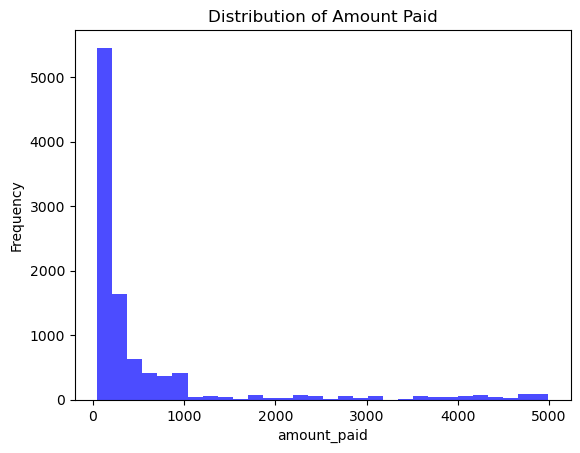

In [ ]:
import matplotlib.pyplot as plt

plt.hist(merged_data['amount_paid'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Amount Paid')
plt.xlabel('amount_paid')
plt.ylabel('Frequency')
plt.show()

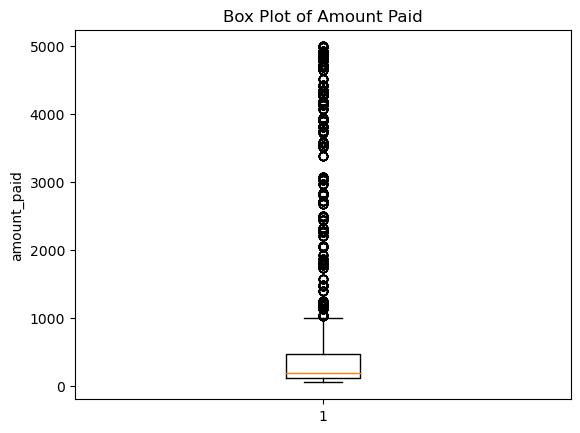

In [ ]:
plt.boxplot(merged_data['amount_paid'])
plt.title('Box Plot of Amount Paid')
plt.ylabel('amount_paid')
plt.show()

# For Categorical Variables

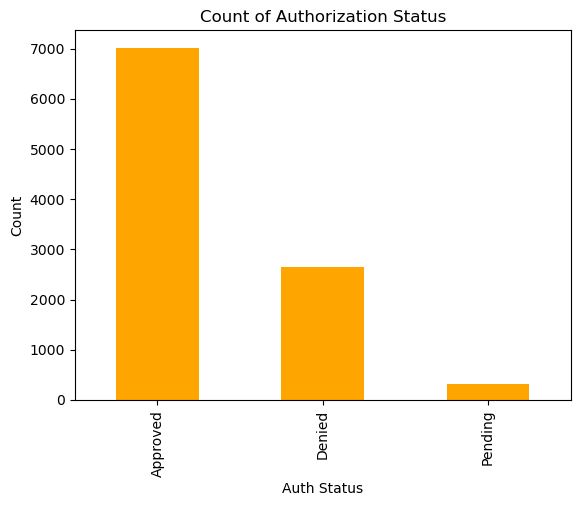

In [ ]:
authstatus_counts = merged_data['authstatus'].value_counts()
authstatus_counts.plot(kind='bar', color='orange')
plt.title('Count of Authorization Status')
plt.xlabel('Auth Status')
plt.ylabel('Count')
plt.show()

# Co relation MAtrix

C:\Users\prach\AppData\Local\Temp\ipykernel_16952\2838837116.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


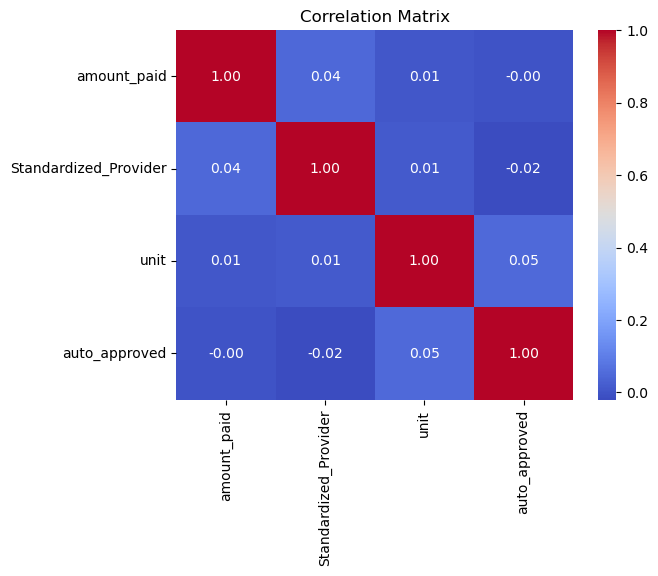

In [ ]:
import seaborn as sns

correlation_matrix = merged_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Bivariate Analysis

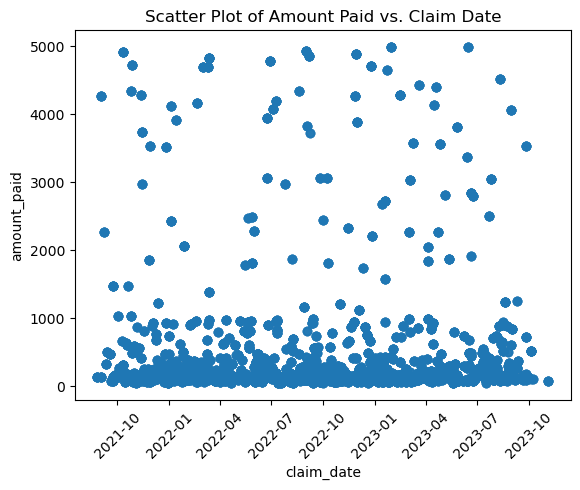

In [ ]:
plt.scatter(merged_data['claim_date'], merged_data['amount_paid'], alpha=0.5)
plt.title('Scatter Plot of Amount Paid vs. Claim Date')
plt.xlabel('claim_date')
plt.ylabel('amount_paid')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


merged_data['submission_month'] = pd.to_datetime(merged_data['submission_date']).dt.month
merged_data['submission_day'] = pd.to_datetime(merged_data['submission_date']).dt.day
merged_data['submission_weekday'] = pd.to_datetime(merged_data['submission_date']).dt.weekday

le = LabelEncoder()
merged_data['service'] = le.fit_transform(merged_data['service'])
merged_data['Standardized_Provider'] = le.fit_transform(merged_data['Standardized_Provider'].astype(str))

features = ['service', 'submission_month', 'submission_day', 'submission_weekday', 'amount_paid', 'unit', 'Standardized_Provider']
target = 'authstatus'

X = merged_data[features]
y = le.fit_transform(merged_data[target])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

class_names = le.classes_
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

KeyError: "['amount_paid'] not in index"

In [86]:
print("Length of X.columns:", len(X.columns))
print("Length of model.feature_importances_:", len(model.feature_importances_))

Length of X.columns: 25
Length of model.feature_importances_: 168


In [87]:
feature_importance = pd.DataFrame([
    {'feature': feature, 'importance': importance}
    for feature, importance in zip(X.columns, model.feature_importances_)
]).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                    feature  importance
5             auto_approved    0.366004
6         clinical_reviewer    0.046478
3               provider_id    0.044154
14            days_to_claim    0.041794
17         service_check-up    0.032734
20          service_surgery    0.032633
4                      unit    0.030503
21      service_vaccination    0.026880
2           submission_date    0.025922
7                    Pet_id    0.025173
0                        id    0.023633
19         service_lab test    0.022597
16   Amount Paid Normalized    0.022177
1                  pet_name    0.015685
15         is_auto_approved    0.010610
18  service_dental cleaning    0.007989
11               Claim Type    0.007648
12              Amount Paid    0.004609
8            claim_pet_name    0.004011
9              Provider NPI    0.003402
10                 Claim ID    0.001749
22            service_x-ray    0.000596
24     average_claim_amount    0.000438
13               Cla

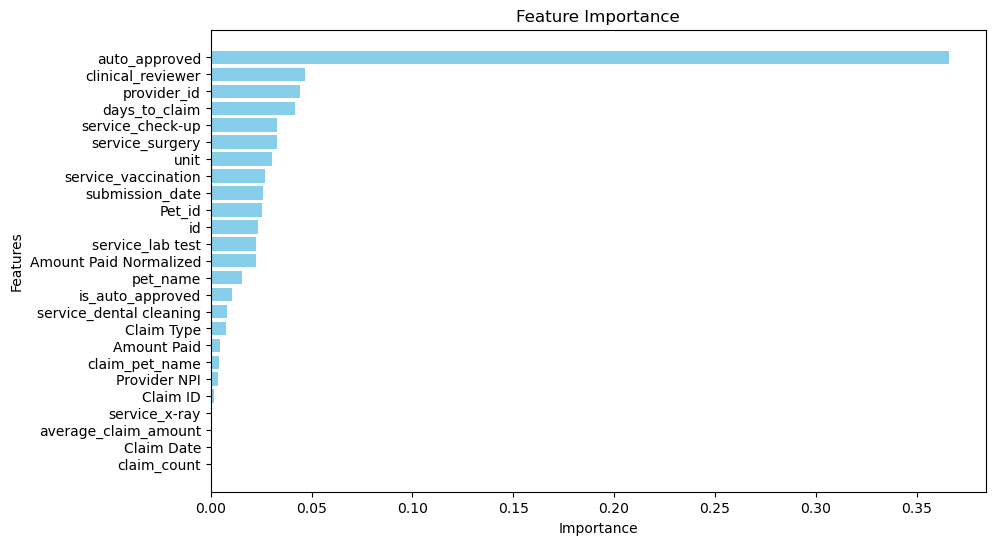

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'feature': [
        'auto_approved', 'clinical_reviewer', 'provider_id', 'days_to_claim', 
        'service_check-up', 'service_surgery', 'unit', 'service_vaccination', 
        'submission_date', 'Pet_id', 'id', 'service_lab test', 
        'Amount Paid Normalized', 'pet_name', 'is_auto_approved', 
        'service_dental cleaning', 'Claim Type', 'Amount Paid', 
        'claim_pet_name', 'Provider NPI', 'Claim ID', 'service_x-ray', 
        'average_claim_amount', 'Claim Date', 'claim_count'
    ],
    'importance': [
        0.366004, 0.046478, 0.044154, 0.041794, 0.032734, 0.032633, 
        0.030503, 0.026880, 0.025922, 0.025173, 0.023633, 0.022597, 
        0.022177, 0.015685, 0.010610, 0.007989, 0.007648, 0.004609, 
        0.004011, 0.003402, 0.001749, 0.000596, 0.000438, 0.000000, 0.000000
    ]
}

feature_df = pd.DataFrame(data)

feature_df = feature_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['feature'], feature_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()
